In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a3c0ba9a2f12717bdf099c374394f0a


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# We zip the latitudes and longitudes into tuples using the zip() function. Returns a ZIP object
lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
# Here, we are casting the lat_lngs Zip object to a List, so that we can index it appropriately later
coordinates = list(lat_lngs)
print(coordinates)

2346), (54.982292495316926, -103.66101555389166), (-63.93875607829939, -149.63871946619818), (-0.35366429070593597, 110.72589784783935), (61.04258369911469, -158.46214410301755), (-9.959241713027595, -160.60307201059652), (28.492950015403494, -160.40082581197402), (67.61211061549713, 82.60517659683933), (-65.26693795199499, -92.98682157861133), (30.460174792723265, 70.08936443976447), (44.723917830028114, -108.67947438689939), (-16.625517940008876, -121.65819805259082), (65.4062304408755, -85.07503092950151), (-17.029232961312076, 117.3902075442075), (-12.164581774643068, 67.03021521901547), (64.35441524948757, 28.24167732353999), (-25.252665429406704, -23.99785478670239), (-59.78658965297079, -100.77555345381751), (10.947164272137343, 116.20102945606533), (-14.608555867559701, -44.61257258339748), (76.22489251776986, -129.8300678478155), (66.26668897447283, 179.39397751479902), (-34.18793323664467, -151.2523178400456), (-16.040090374933484, -43.65017582690746), (84.89672173130825, 178

In [5]:
# Creating a random list of cities using citypy -----------------------------------------

# Open source, docs on Github: https://github.com/wingchen/citipy
# Citipy allows us to pass in coordinates and returns a city name, as a city object

from citipy import citipy

In [6]:
# Practice getting a city and country code by passing in randomly generated latitudes and longitudes

# Loop through 5/1500 values in the coordinates list
for coordinate in coordinates[:5]:
    # using the nearest_city function from the citipy module, we pass in the first and second coordinates (latitude, longitude) and print the city_name attribute
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
    # we do the same, but return country_code attribute
    citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

weinan cn
esperance au
nikolskoye ru
arlit ne
moree au


In [7]:
# We can use the above methodology to pass in our randomly generated coordinates and return city names, which we can use the OpenWeather API to access weather of 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination. Loop through each coordinates in our coordinates list above
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list. From our list of randomly generated coordinates, we might have duplicated cities!
    # Important to account for edge cases
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

# Project plan! --------------------------

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
4.  Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
5. Build the city_url or endpoint for each city.
6. Log the URL and the record and set numbers.
7. Make an API request for each city.
    Parse the JSON weather data for the following:
        City, country, and date
        Latitude and longitude
        Maximum temperature
        Humidity
        Cloudiness
        Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [8]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [9]:
# 2. Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# This 

In [10]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a3c0ba9a2f12717bdf099c374394f0a&q=kensington'

In [11]:
# Loop through all the cities in the list.
# Enumerate converts the iterable object passed to it into an Enumerate object, which is a tuple of structure: (<index>,<value>)
# In the case below, the first record would be (0, <first city>)
# Enumerate's second, optional argument takes a starting value. If we passed enumerate(cities,10), then the first record would be (10, <first city>) instead
# Combining this with tuple unpacking, we can get both the index AND the city separately, as needed
for i, city in enumerate(cities):

    # 3/4. Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # 5. In cases where cities have spaces in their names, we want to remove the spaces with the replace() method and concatenate with "+" to avoid errors
    city_url = url + "&q=" + city.replace(" ","+")

    # 6. Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Try & Except blocks ------------------------------

# In case of errors, we don't want our code to immediately reach break out; instead we want to be able to return information to the user as to why certain information wasn't able to be found
# In the case of a bad URL in an API call, for example, we can use a try, except block to bypass that specific city and return the remaining cities
# Docs on Exception Handling: https://docs.python.org/3.6/tutorial/errors.html
# 7. Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

        # If an error is experienced, skip the city.
        # After except, we can even specify the type of error (ValueError, KeyError etc) to only cause exceptions to certain types of expected errors
    except:
        print("City not found. Skipping...")
        # Instead of writing pass, we can also use the keyword continue to indicate that the try code block above is run again (reset)
        # pass does nothing and continues reading the code below
        # Generally not good to Pass on errors, better practice to return some information or use another try block to handle the expected error
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

os
Processing Record 46 of Set 16 | lebu
Processing Record 47 of Set 16 | ayan
Processing Record 48 of Set 16 | klyuchi
Processing Record 49 of Set 16 | new norfolk
Processing Record 50 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 17 | broome
Processing Record 2 of Set 17 | alekseyevsk
Processing Record 3 of Set 17 | lolua
City not found. Skipping...
Processing Record 4 of Set 17 | luderitz
Processing Record 5 of Set 17 | khatanga
Processing Record 6 of Set 17 | neka
Processing Record 7 of Set 17 | bambous virieux
Processing Record 8 of Set 17 | fairbanks
Processing Record 9 of Set 17 | lata
Processing Record 10 of Set 17 | aklavik
Processing Record 11 of Set 17 | norman wells
Processing Record 12 of Set 17 | akyab
Processing Record 13 of Set 17 | chiman
Processing Record 14 of Set 17 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 17 | awjilah
Processing Record 16 of Set 17 | karaul
City not found. Skipping...
Pro

In [12]:
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Weinan,34.5036,109.5089,41.00,74,0,2.24,CN,2021-02-05 22:32:26
1,Esperance,-33.8667,121.9000,59.00,94,90,4.61,AU,2021-02-05 22:32:26
2,Nikolskoye,59.7035,30.7861,12.00,78,75,13.42,RU,2021-02-05 22:32:26
3,Arlit,18.7369,7.3853,65.77,24,0,5.48,NE,2021-02-05 22:32:27
4,Moree,-29.4667,149.8500,75.20,60,90,19.57,AU,2021-02-05 22:32:27
5,Provideniya,64.3833,-173.3000,7.47,90,100,14.52,RU,2021-02-05 22:32:27
6,Butaritari,3.0707,172.7902,81.61,80,87,18.52,KI,2021-02-05 22:32:27
7,Kapaa,22.0752,-159.3190,71.01,60,75,2.98,US,2021-02-05 22:28:39
8,Cape Town,-33.9258,18.4232,69.01,88,0,14.97,ZA,2021-02-05 22:31:24
9,Luwuk,-0.9516,122.7875,78.69,72,100,3.62,ID,2021-02-05 22:32:27


In [13]:
# Reordering columns for readability
# We need to pass a list with the reordered columns into the index of the DataFrame, as below
city_data_df = city_data_df[['City', 'Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Weinan,CN,2021-02-05 22:32:26,34.5036,109.5089,41.00,74,0,2.24
1,Esperance,AU,2021-02-05 22:32:26,-33.8667,121.9000,59.00,94,90,4.61
2,Nikolskoye,RU,2021-02-05 22:32:26,59.7035,30.7861,12.00,78,75,13.42
3,Arlit,NE,2021-02-05 22:32:27,18.7369,7.3853,65.77,24,0,5.48
4,Moree,AU,2021-02-05 22:32:27,-29.4667,149.8500,75.20,60,90,19.57
...,...,...,...,...,...,...,...,...,...
578,Popondetta,PG,2021-02-05 22:33:25,-8.7537,148.2534,83.41,76,98,2.13
579,Pineville,US,2021-02-05 22:33:25,31.3224,-92.4343,51.80,61,1,6.91
580,Arman,RU,2021-02-05 22:33:25,59.7000,150.1667,-7.49,82,86,10.36
581,Iberia,US,2021-02-05 22:28:42,29.9502,-91.7507,44.60,93,90,14.97


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# to_csv method outputs our data to a csv file at the path specified above
# index_label appends the specified header "City_ID" to the column, instead of it being blank
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Plotting weather data to find insights
# Extract relevant fields from the DataFrame for plotting. Assign each column to its own Series
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

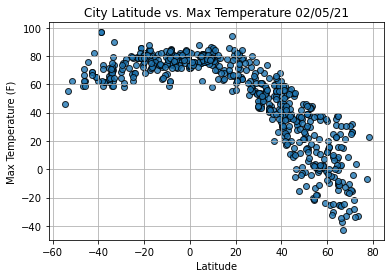

In [16]:
# To import the CURRENT time, we need to use the built-in time module from python
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# "%x" in strftime() returns the date in mm-dd-yy format
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

Looking at the data above when compared to the date (04Feb2021), we can surmise that a large portion of our data is in the Southern Hemisphere, where it is currently summer (higher temperatures).

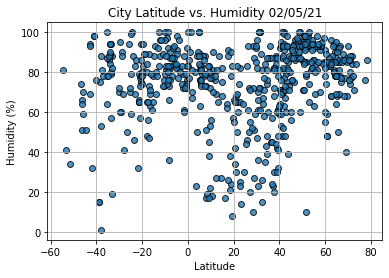

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

Looking at the Equator, or 0 Latitude, we can see some areas are very humid (Rainforest) while others very dry (Sahara, Middle East)

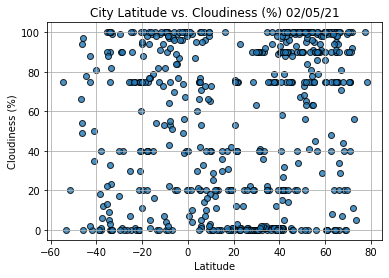

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

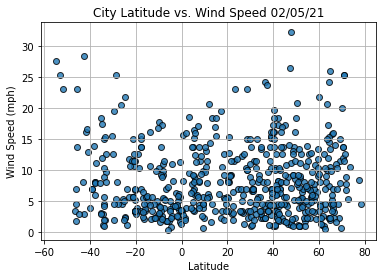

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Linear Regression -----------------------------

# We want to see the relationship between latitude and multiple dependent variables
# We can do so by using SciPy Stats linear regression and plotting the best fit line to find the correlation (r) value

# Instead of manually calling the same block of code to use the same function for four different plots, we will make a function instead -------------------
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data. Pack linregress outputs into a tuple
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept. 
    # This simulates the equation of a line y = mx + b, where regress_values = m(slope) * x(x_values) + b(intercept)
    regress_values = x_values * slope + intercept
    # Get the equation of the line, in order to put this on our plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, color="r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    # Since we're only using latitudes as the independent variable, our x label can be constant
    plt.xlabel('Latitude')
    plt.title(title)
    # Y label will depend on what we are using this function to measure, hence pass in variable
    plt.ylabel(y_label)
    plt.show()

    return "r= " + str(r_value)
# To create our dataset, we can filter the original dataset into northern and southern hemispheres
# Remember we can use the .loc function to filter row thats meet the specified criteria (Boolean, index, or labels)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Weinan,CN,2021-02-05 22:32:26,34.5036,109.5089,41.00,74,0,2.24
2,Nikolskoye,RU,2021-02-05 22:32:26,59.7035,30.7861,12.00,78,75,13.42
3,Arlit,NE,2021-02-05 22:32:27,18.7369,7.3853,65.77,24,0,5.48
5,Provideniya,RU,2021-02-05 22:32:27,64.3833,-173.3000,7.47,90,100,14.52
6,Butaritari,KI,2021-02-05 22:32:27,3.0707,172.7902,81.61,80,87,18.52
...,...,...,...,...,...,...,...,...,...
574,Vaulx-En-Velin,FR,2021-02-05 22:32:33,45.7833,4.9333,53.60,87,0,8.05
576,Sungairaya,ID,2021-02-05 22:33:24,0.7000,108.9000,75.94,90,100,8.28
579,Pineville,US,2021-02-05 22:33:25,31.3224,-92.4343,51.80,61,1,6.91
580,Arman,RU,2021-02-05 22:33:25,59.7000,150.1667,-7.49,82,86,10.36


In [22]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Esperance,AU,2021-02-05 22:32:26,-33.8667,121.9000,59.00,94,90,4.61
4,Moree,AU,2021-02-05 22:32:27,-29.4667,149.8500,75.20,60,90,19.57
8,Cape Town,ZA,2021-02-05 22:31:24,-33.9258,18.4232,69.01,88,0,14.97
9,Luwuk,ID,2021-02-05 22:32:27,-0.9516,122.7875,78.69,72,100,3.62
10,Atuona,PF,2021-02-05 22:32:27,-9.8000,-139.0333,79.56,81,4,17.76
...,...,...,...,...,...,...,...,...,...
563,Sao Raimundo Das Mangabeiras,BR,2021-02-05 22:33:23,-7.0219,-45.4811,76.37,87,51,5.28
575,Lubumbashi,CD,2021-02-05 22:33:24,-11.6609,27.4794,64.35,96,100,2.26
577,Hualmay,PE,2021-02-05 22:31:19,-11.0964,-77.6139,72.32,73,73,9.95
578,Popondetta,PG,2021-02-05 22:33:25,-8.7537,148.2534,83.41,76,98,2.13


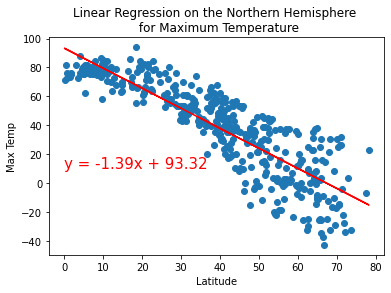

'r= -0.8669922759645368'

In [41]:
# Now that our dataframes have been created, we can plot the data by assigning x and y values

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,10))

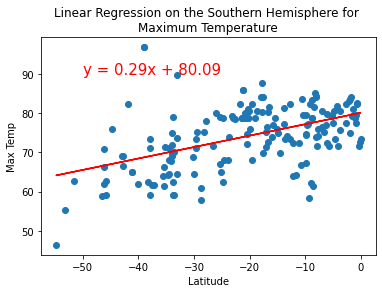

'r= 0.4899393190543352'

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \nMaximum Temperature', 'Max Temp',(-50,90))

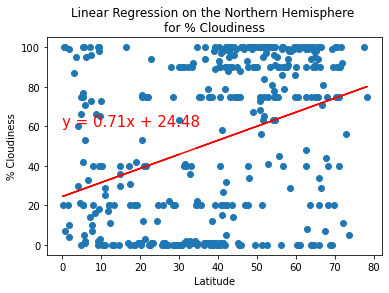

'r= 0.3501334778383205'

In [47]:
# Refactor code to perform linear regression on latitude vs % cloudiness

# Linear regression on the Northern Hemisphere, switching out Max Temp for Percent Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(0,60))

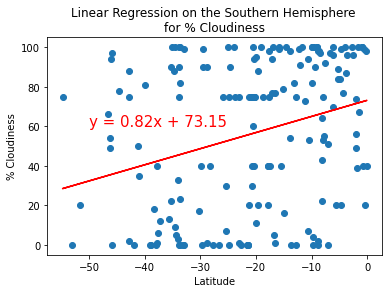

'r= 0.2889425243292131'

In [49]:
# Linear regression on the Northern Hemisphere, switching out Max Temp for Percent Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

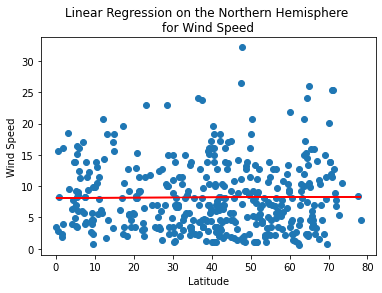

'r= 0.006772833147596009'

In [51]:
# Linear regression on the Northern Hemisphere, switching out Cloudiness for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

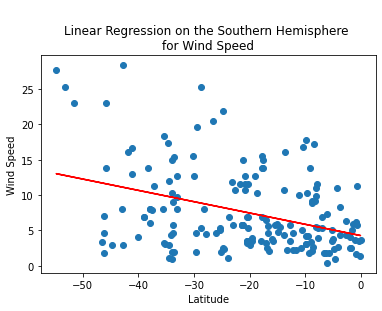

'r= -0.3737169427827869'

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))